Assumption for this test is TS is stationary

Granger causalty means past values of t2 have statistically significant effect on current values of t1, taking past values of t1 as regressors. Hence we can build a AR model.
H0: Time series in second column t2 does not Granger cause the time series in first column t1 

The null hypothesis for all four tests is that coefficients corresponding to past values of second time series are 0

==> params_ftest, ssr_ftest, are based on f distribution

In [4]:
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
np.random.seed(0)
# build a time series, just a simple AR(1)
t1 = [0.1 * np.random.normal()]

In [6]:
# form each new value from current last value
for _ in range(100):
    t1.append(0.5 * t1[-1] + 0.1*np.random.normal())

In [11]:
t1[0:10]

[0.1764052345967664,
 0.12821833813510553,
 0.16198296747812668,
 0.30508080365920914,
 0.3392962008446013,
 0.07192031243465956,
 0.13096899796988873,
 0.05034877815517458,
 0.014852503898231504,
 0.048486102142952986]

In [15]:
# Build t2 that granger causes t1

t2 = [item + 0.1 * np.random.normal() for item in t1]
t2[0:10]

[-0.00044861047093666673,
 0.16376651740948245,
 0.24343494972691332,
 0.3109733625773721,
 0.3207908337436672,
 -0.008844536326976016,
 -0.013684471986450064,
 0.13037857308917733,
 -0.016058940578939376,
 0.025139435988583713]

In [16]:
# adjust t1 and t2

t1 = t1[3:]
t2 = t2[:-3]

In [17]:
len(t1), len(t2)

(98, 98)

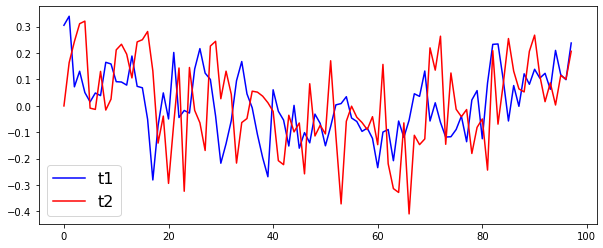

In [18]:
plt.figure(figsize=(10,4))
plt.plot(t1, color = 'b')
plt.plot(t2, color = 'r')

plt.legend(["t1", "t2"], fontsize = 16)


## ADF test

In [19]:
# check for stationarity

def check_stationarity(y):
    result = adfuller(y)
    
    print("ADF statistic: %f" % result[0])
    print(" p value: %f" % result[1])
    print("Critical values: ")
    
    for k, v in result[4].items():
        print("\t%s: %.3f" %(k, v))

In [20]:
check_stationarity(t1)
# stationary series

ADF statistic: -5.117516
 p value: 0.000013
Critical values: 
	1%: -3.500
	5%: -2.892
	10%: -2.583


In [21]:
check_stationarity(t2)
# stationary series

ADF statistic: -4.299022
 p value: 0.000446
Critical values: 
	1%: -3.500
	5%: -2.892
	10%: -2.583


In [22]:
ts_df = pd.DataFrame(columns = ['t2', 't1'], data = zip(t2, t1))

In [24]:
ts_df

,t2,t1
0,-0.000449,0.305081
1,0.163767,0.339296
2,0.243435,0.071920
3,0.310973,0.130969
4,0.320791,0.050349
...,...,...
93,0.086969,0.062587
94,0.003029,0.209880
95,0.115288,0.117631
96,0.100860,0.099015


## Granger casuality

In [25]:
# Can I model t1 using previous value of t1 and previous value of t2 
gc_res = grangercausalitytests(ts_df, maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=17.2941 , p=0.0001  , df_denom=94, df_num=1
ssr based chi2 test:   chi2=17.8460 , p=0.0000  , df=1
likelihood ratio test: chi2=16.3815 , p=0.0001  , df=1
parameter F test:         F=17.2941 , p=0.0001  , df_denom=94, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.5354  , p=0.0002  , df_denom=91, df_num=2
ssr based chi2 test:   chi2=20.1186 , p=0.0000  , df=2
likelihood ratio test: chi2=18.2654 , p=0.0001  , df=2
parameter F test:         F=9.5354  , p=0.0002  , df_denom=91, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=39.5447 , p=0.0000  , df_denom=88, df_num=3
ssr based chi2 test:   chi2=128.0709, p=0.0000  , df=3
likelihood ratio test: chi2=81.0932 , p=0.0000  , df=3
parameter F test:         F=39.5447 , p=0.0000  , df_denom=88, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=28.5011 , p=0.0000  , df_d

=> significant lag, so granger casuality is present

In [ ]:
#nt1 = np.random.normal(50)
#nt2 = np.random.normal(50)
# Here there's no granger causality